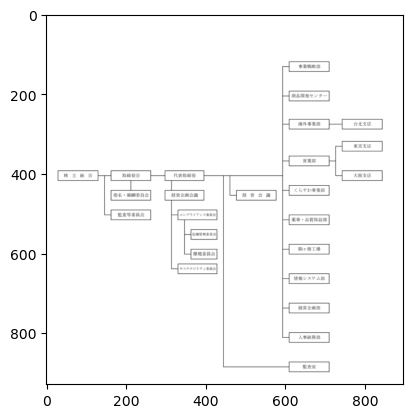

In [3]:
import cv2 as cv
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
from ipywidgets import widgets
img = cv.imread("youmei.png")
plt.imshow(img)
plt.show()

## Functions for Detection

In [15]:
def DetectSquares(img):
        # make fig black and white
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, binary = cv.threshold(gray, 254, 255, cv.THRESH_BINARY)
    binary_inv = cv.bitwise_not(binary)

    # detect shapes
    contours, hierarchy = cv.findContours(
        binary_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )
    contours = list(filter(lambda x: cv.contourArea(x) > 3000, contours))

    # fill 
    full = np.zeros_like(img)
    cv.fillPoly(full, pts=contours, color=(255, 255, 255))
    full_inv = cv.bitwise_not(full)
    full_gray = cv.cvtColor(full_inv, cv.COLOR_BGR2GRAY)

    # corner detection
    MAX_CORNERS = 500
    BLOCK_SIZE = 3
    QUALITY_LEVEL = 0.2
    MIN_DISTANCE  = 5
    corners = cv.goodFeaturesToTrack(full_gray, MAX_CORNERS, QUALITY_LEVEL,
                                    MIN_DISTANCE, blockSize=BLOCK_SIZE,
                                    useHarrisDetector=False)
    corners = np.int0(corners)

    for i in corners:
        x,y=i.ravel()
        img_circle = cv.circle(full_gray,(x,y),10,(255,255,255),-1)
        img_circle = cv.cvtColor(full_gray,cv.COLOR_BGR2RGB)


    gray = cv.cvtColor(img_circle, cv.COLOR_BGR2GRAY)
    gray2 = cv.bitwise_not(gray)
    lines = cv.HoughLinesP(gray2, rho=1, theta=np.pi/360, threshold=80, minLineLength=400, maxLineGap=5)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        no_lines_img = cv.line(img_circle, (x1,y1), (x2,y2), (255,255,255), 3)
    kernel = np.ones((5,5),np.uint8)
    closing = cv.morphologyEx(no_lines_img, cv.MORPH_CLOSE, kernel)

    gray_closing = cv.cvtColor(closing,cv.COLOR_BGR2GRAY)
    ret, closing_thresh = cv.threshold(gray_closing,70,255,cv.THRESH_BINARY_INV)
    contours, hierarchy = cv.findContours(closing_thresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:
            img_detected = cv.drawContours(img, contours, i, (255, 0, 0), 5)

    plt.imshow(img_detected)
    print(f"Num of squares: {len(contours)}")


In [21]:
def DetectCorners(img):
    # make fig black and white
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, binary = cv.threshold(gray, 254, 255, cv.THRESH_BINARY)
    binary_inv = cv.bitwise_not(binary)

    # detect shapes
    contours, hierarchy = cv.findContours(
        binary_inv, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )
    contours = list(filter(lambda x: cv.contourArea(x) > 3000, contours))

    # fill 
    full = np.zeros_like(img)
    cv.fillPoly(full, pts=contours, color=(255, 255, 255))
    full_inv = cv.bitwise_not(full)
    full_gray = cv.cvtColor(full_inv, cv.COLOR_BGR2GRAY)

    # corner detection
    MAX_CORNERS = 500
    BLOCK_SIZE = 3
    QUALITY_LEVEL = 0.5
    MIN_DISTANCE  = 7
    corners = cv.goodFeaturesToTrack(full_gray, MAX_CORNERS, QUALITY_LEVEL,
                                    MIN_DISTANCE, blockSize=BLOCK_SIZE,
                                    useHarrisDetector=False)
    corners = np.int0(corners)
    
    for i in corners:
        x,y=i.ravel()
        cv.circle(img, (x,y), 5, (0,0,255), 2)

    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    print(f"Corners:  {len(corners)}")


Num of squares: 25


/var/folders/mz/k5cvq67n1cdd51htpfqt0wbh0000gn/T/ipykernel_85103/1529204496.py:27: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


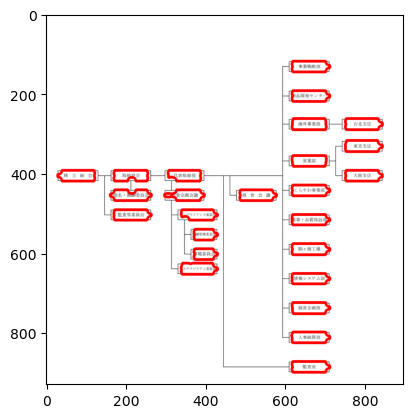

In [23]:
img = cv.imread("youmei.png")
DetectSquares(img)

/var/folders/mz/k5cvq67n1cdd51htpfqt0wbh0000gn/T/ipykernel_85103/2515175703.py:27: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


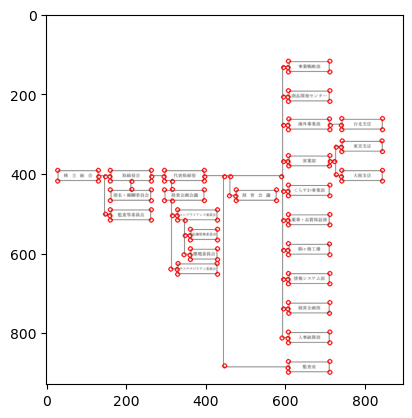

Corners:  157


In [26]:
img = cv.imread("youmei.png")
DetectCorners(img)